In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




<h1 style="font-size: 48px;">base model</h1>


# base model

Linear Regression only, predict credit

 

In [57]:
file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)

# 假设 data 是您已经正确处理的 DataFrame
# 准备输入特征X和目标变量y
X = data.drop('credits', axis=1)  # 移除目标变量列
y = data['credits']  # 目标变量

# 划分训练集和测试集，比例为80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型实例
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, a_min=0, a_max=None)  # 确保预测值不为负数

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型性能
print("均方误差 (MSE):", mse)
print("决定系数 (R^2):", r2)

均方误差 (MSE): 3147262948330286.0
决定系数 (R^2): 0.9907407802675333


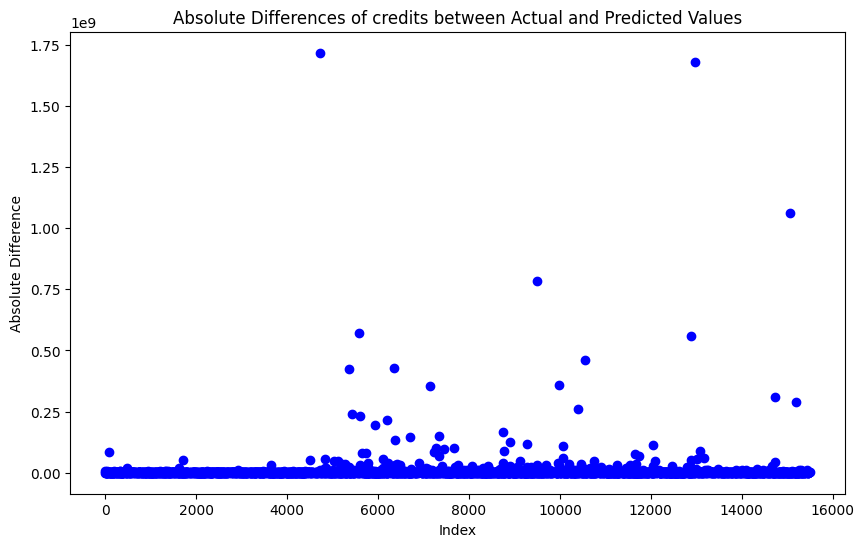

In [58]:
import matplotlib.pyplot as plt

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences of credits between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.show()


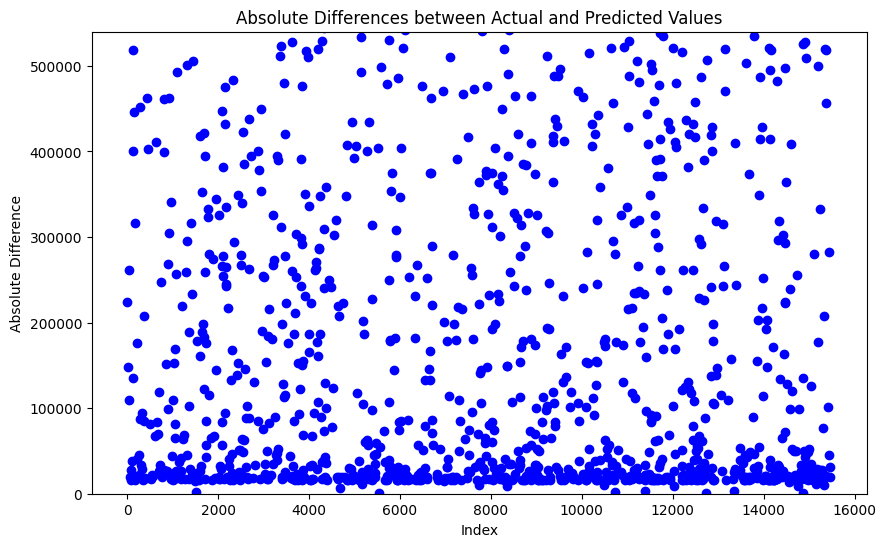

In [36]:
import matplotlib.pyplot as plt

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.ylim(0, 540000)  # 设置 y 轴的显示范围为 0 到 14000
plt.show()


# base model

Linear Regression only, predict NonVIP_average_click

In [59]:
file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)
# 假设 data 是您已经正确处理的 DataFrame
# 准备输入特征X和目标变量y
X = data.drop(['NonVIP_average_click','credits'], axis=1)  # 移除目标变量列
y = data['NonVIP_average_click']  # 目标变量

# 划分训练集和测试集，比例为80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型实例
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)
y_pred = np.clip(y_pred, a_min=0, a_max=None)  # 确保预测值不为负数

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型性能
print("均方误差 (MSE):", mse)
print("决定系数 (R^2):", r2)

均方误差 (MSE): 123263078.13311392
决定系数 (R^2): 0.8797413223108169


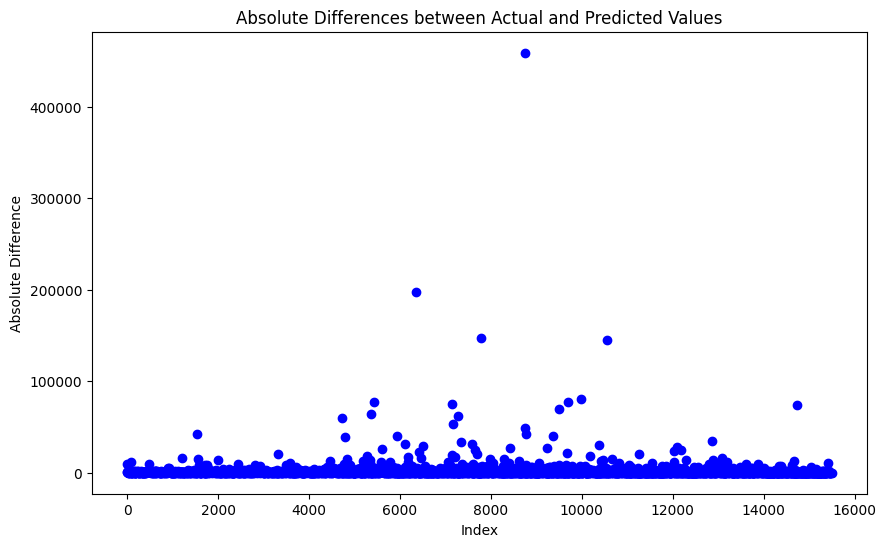

In [60]:
import matplotlib.pyplot as plt

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
#plt.ylim(0, 40000)  # 设置 y 轴的显示范围为 0 到 14000
plt.show()


<h1 style="font-size: 48px;">impoving model 1</h1>

<h3>filter out ['NonVIP_average_click'] > 10</h3>

<h3>then Linear Regression</h3>

Linear Regression model after filtering books with <10 'NonVIP_average_click':
MSE: 120329312.86247197
R²: 0.807951012290418


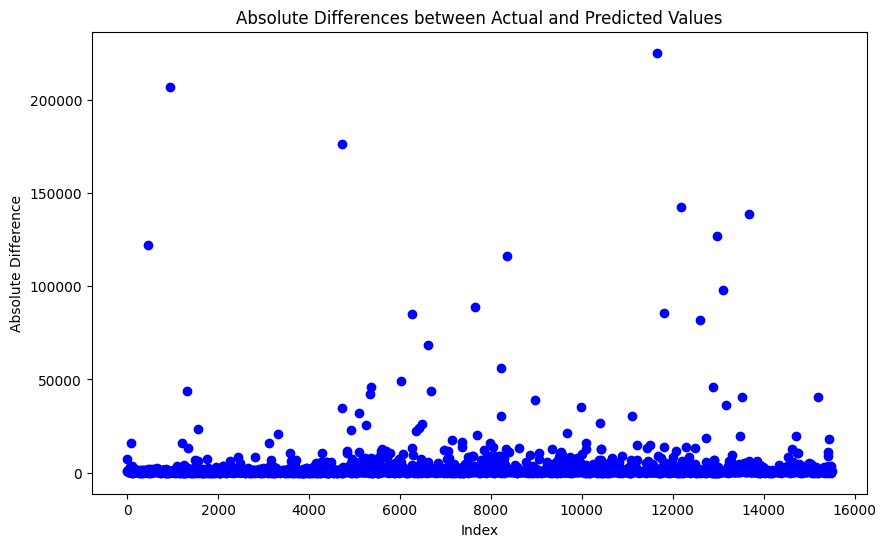

In [65]:

# 加载数据（假设已加载为 data）

# 过滤掉 'NonVIP_average_click' 为 0 的书籍
filtered_data = data[(data['NonVIP_average_click'] > 10) ]

# 选择特征和目标变量，这次我们假设 'credits' 是目标变量
X = filtered_data.drop(['NonVIP_average_click'], axis=1)
y = filtered_data['NonVIP_average_click']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 进行预测
y_pred = lr_model.predict(X_test)

# 性能评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression model after filtering books with <10 'NonVIP_average_click':")
print(f"MSE: {mse}")
print(f"R²: {r2}")

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
#plt.ylim(0, 40000)  # 设置 y 轴的显示范围为 0 到 40000，如果需要
plt.show()

<h1>impoving model 2</h1>
<h1>nuroun network</h1>
<h1>filter = ['NonVIP_average_click'] > 10</h1>
<h1>predict = ['NonVIP_average_click']</h1>
<h1>X = largest_cluster_data.drop(['NonVIP_average_click','credits'], axis=1)</h1>


In [47]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)


# 过滤掉 'NonVIP_average_click' 为 0 的书籍
filtered_data = data[data['NonVIP_average_click'] > 10]


# 选择 'NonVIP_average_click' 和 'credits' 作为聚类的特征
features_for_clustering = filtered_data[['NonVIP_average_click', 'credits']]

# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# 使用KMeans算法进行聚类
kmeans = KMeans(n_clusters=5, random_state=42)
filtered_data['cluster'] = kmeans.fit_predict(features_scaled)

# 计算每个簇的统计数据并找出数量最多的簇
cluster_stats = filtered_data.groupby('cluster').agg(count=('NonVIP_average_click', 'count')).reset_index()
largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

# 筛选出数量最多簇的数据
largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]

X = largest_cluster_data.drop(['NonVIP_average_click']+['credits'], axis=1)
y = largest_cluster_data['NonVIP_average_click']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# 预测
y_pred = model.predict(X_test_scaled)

# 评估模型
mse = model.evaluate(X_test_scaled, y_test)
r2 = r2_score(y_test, y_pred.flatten())  # 使用 r2_score 并确保预测值与实际值维度相同

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")


Epoch 1/50


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_5400\1356202456.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(features_scaled)
c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


246/246 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8343916.5000 - val_loss: 5482436.5000
Epoch 2/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 4395338.5000 - val_loss: 3729770.5000
Epoch 3/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3907870.2500 - val_loss: 3558061.0000
Epoch 4/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3555283.5000 - val_loss: 3469882.0000
Epoch 5/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3628779.7500 - val_loss: 3456245.7500
Epoch 6/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3372757.5000 - val_loss: 3420756.2500
Epoch 7/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3365631.2500 - val_loss: 3386330.2500
Epoch 8/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3019257.2500 - val_loss: 3393322.5000
Epoch 9/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3385185.5000 - val_loss: 3343011.7500
Epoch 10/50
246/246 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2980070.7500 - val_loss: 3406695.0000
Epoch 11/50
246/246 ━━━━━━━━━━

In [48]:
# 预测
y_pred = model.predict(X_test_scaled).flatten()  # 使用 flatten 确保预测结果是一维的

# 评估模型
mse = model.evaluate(X_test_scaled, y_test)
r2 = r2_score(y_test, y_pred)  # 已经确保 y_pred 是一维的，无需再次处理

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

# 打印前30个预测实际对比数据
samples_index = range(30)  # 选择前30个样本
real_data = y_test.iloc[samples_index]
predicted_data = y_pred[samples_index]
comparison = pd.DataFrame({'Real Data': real_data, 'Predicted Data': predicted_data})
print(comparison)


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 803us/step - loss: 1539483.8750
Test MSE: 2142283.25
Test R²: 0.7088330900507047
       Real Data  Predicted Data
1614       181.0      329.481812
11451     1341.0      378.645386
942        195.0      378.755035
2271       249.0      417.842377
9648      2449.0     1248.912598
10186      182.0      347.065857
12172      319.0      442.430145
4917       369.0     1016.698486
11494       19.0      390.710968
11381      258.0      248.237015
13785      136.0      294.283386
13036      548.0      534.646790
15495      345.0      325.259338
12122      563.0      275.785126
4699       326.0      421.572449
4313       181.0      426.098694
3156       286.0      738.698486
2195       529.0      434.182648
10114      355.0      755.325623
12900      849.0     3114.362549
14822      201.0      279.137512
12709      151.0      311.871277
774        157.0      415.093933
1490       105.0      543.406921
4068       234.0      4

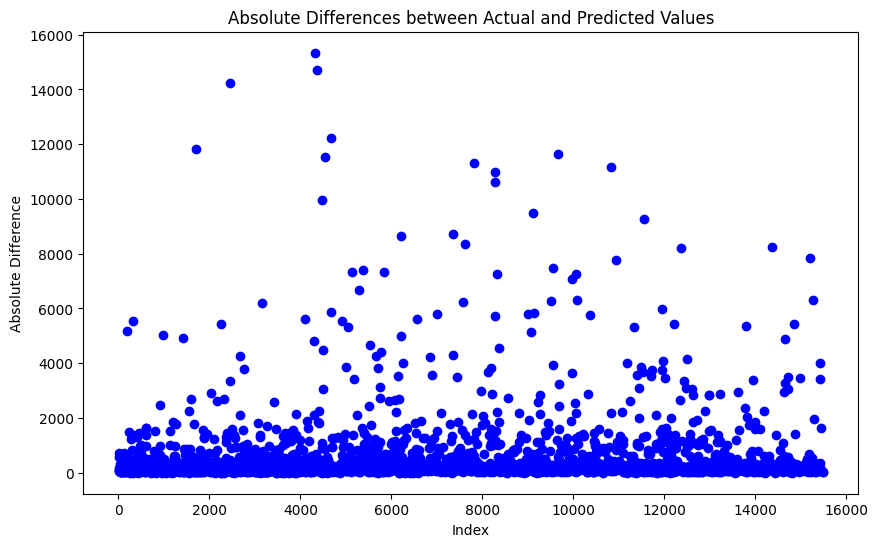

In [49]:
import matplotlib.pyplot as plt

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.show()


<h1>model 3 random forest</h1>

In [71]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)

# 过滤掉 'NonVIP_average_click' 为 0 的书籍
filtered_data = data[data['NonVIP_average_click'] > 10]

# 选择 'NonVIP_average_click' 和 'credits' 作为聚类的特征
features_for_clustering = filtered_data[['NonVIP_average_click', 'credits']]

# 标准化特征
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_for_clustering)

# 使用KMeans算法进行聚类
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
filtered_data['cluster'] = kmeans.fit_predict(features_scaled)

# 计算每个簇的统计数据并找出数量最多的簇
cluster_stats = filtered_data.groupby('cluster').agg(count=('NonVIP_average_click', 'count')).reset_index()
largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

# 筛选出数量最多簇的数据
largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]
X = largest_cluster_data.drop(['NonVIP_average_click', 'credits'], axis=1)
y = largest_cluster_data['NonVIP_average_click']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立随机森林模型
model = RandomForestRegressor(n_estimators=100, random_state=42)

# 训练模型
model.fit(X_train_scaled, y_train)

# 预测
y_pred = model.predict(X_test_scaled)

# 评估模型
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # 使用 r2_score 并确保预测值与实际值维度相同

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_5400\3013530180.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(features_scaled)


Test MSE: 1406065.1363091834
Test R²: 0.8088956557384459


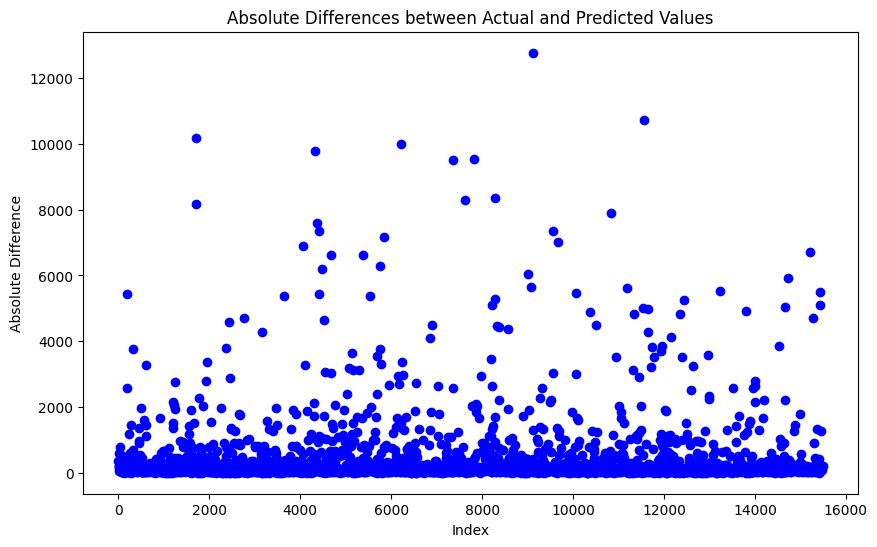

In [72]:
# 预测
y_pred = model.predict(X_test_scaled).flatten()  # 使用 flatten 确保预测结果是一维的

import matplotlib.pyplot as plt

# 计算实际值和预测值之间的绝对差异
differences = abs(y_test - y_pred)

# 创建图像
plt.figure(figsize=(10, 6))
plt.scatter(y_test.index, differences, color='blue')
plt.title('Absolute Differences between Actual and Predicted Values')
plt.xlabel('Index')
plt.ylabel('Absolute Difference')
plt.show()